we have been mostly using only this time series data and not other variables. **Only SARIMAX** model had the option of incorporating few **exogenous variables** but with the current development in the field of **machine learning** and **deep learning** we can build really **advanced prediction models** very easily in our software. On a large number of input variables and these models often are able to **predict** at a **much better accuracy** than the **normal times series** forecasting models.

What is the difference between **forecasting** and **prediction**?

The difference is only the inclusion of **temporal component**. Prediction is estimating outcome for unseen data but **forecasting** is a sub discipline of **prediction** where we are making prediction on the future **using times** it is so if you add the time dimension also and then try to predict future values then your prediction problem becomes a forecasting problem.

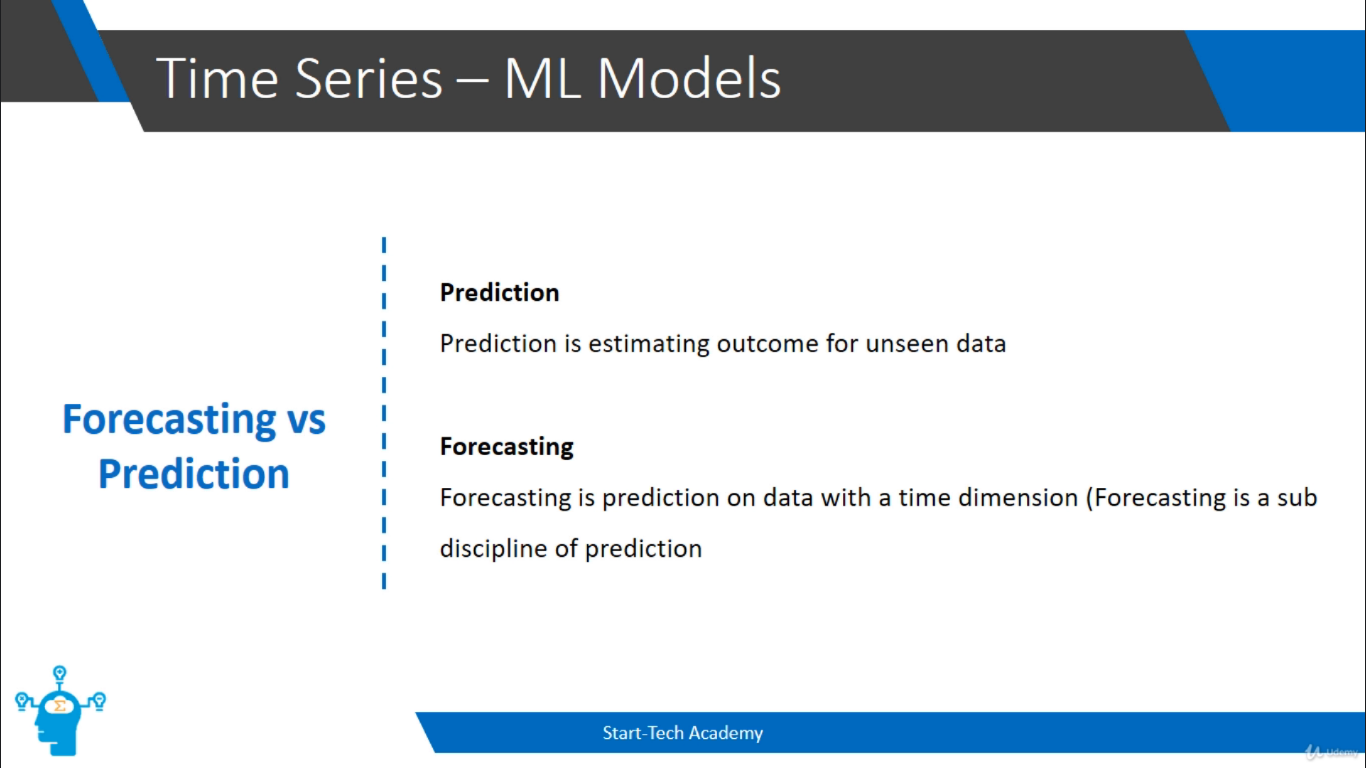

However you can always **add time series data** and **time features** to your dataset to make it a **forecasting** problem. So the same predictive models wait times that this data will work as forecasting models.

- While keeping **variable names**, try not to use space, instead use an **underscore**, for example, crime_rate. This is because some softwares do not accept spaces and variable names.
- Secondly, try to keep names such that you can recognize the actual variable that is avoid to put names like X1, X2, X3.

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline

# Load Data

In [3]:
current_dir = Path('.').resolve()

In [4]:
file_path = current_dir / 'data/House_Price.csv'

In [10]:
df = pd.read_csv(file_path, header=0)

In [11]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


## Numerical

In [12]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


For crime_rate, there is a big difference between max and 75% which means that our data is skewed or there is an outlier.

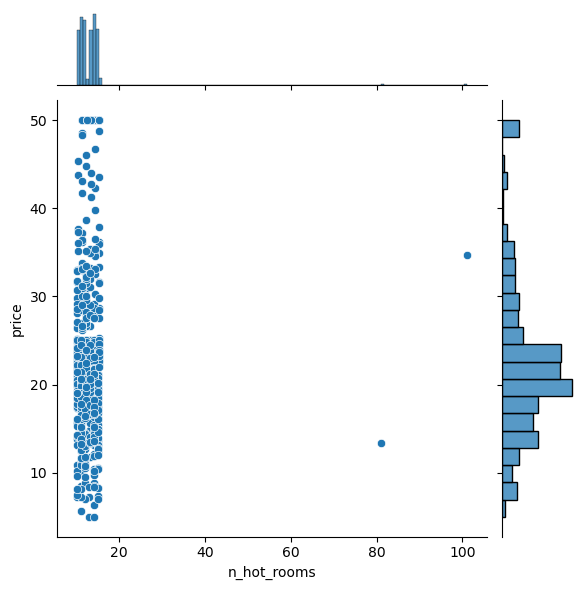

In [14]:
sns.jointplot(x='n_hot_rooms', y='price', data=df)

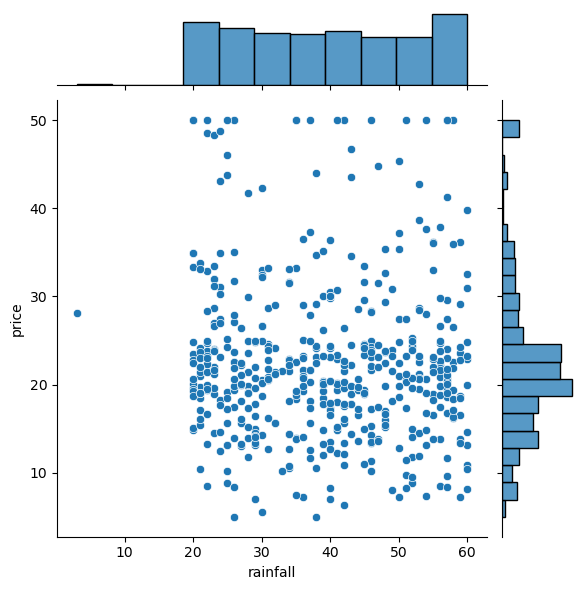

In [15]:
sns.jointplot(x=df['rainfall'], y=df['price'])

## Categorical

<AxesSubplot:xlabel='airport', ylabel='count'>

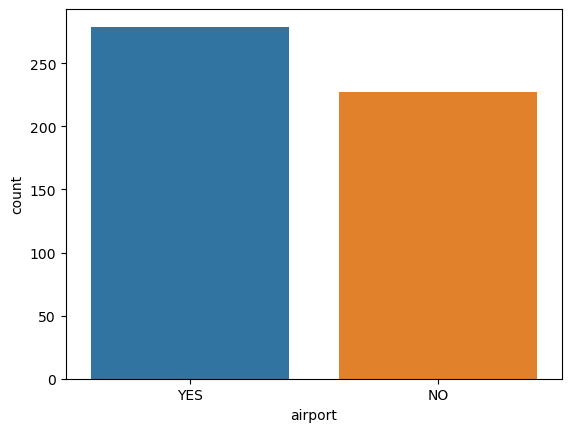

In [17]:
sns.countplot(data=df, x='airport')

<AxesSubplot:xlabel='waterbody', ylabel='count'>

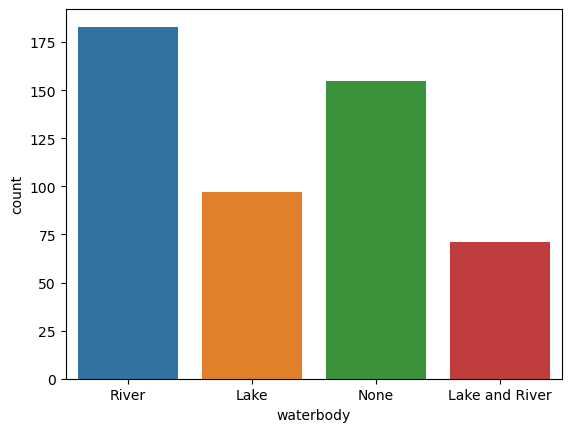

In [18]:
sns.countplot(data=df, x='waterbody')

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

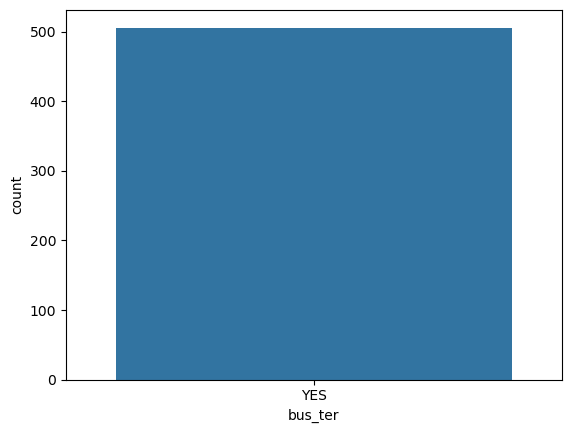

In [19]:
sns.countplot(data=df, x='bus_ter')

## Outliers

In [20]:
np.percentile(df['n_hot_rooms'], [99])

array([15.39952])

In [21]:
np.percentile(df['n_hot_rooms'], [99])[0]

15.39952

In [22]:
uv = np.percentile(df['n_hot_rooms'], [99])[0]

In [23]:
df[df['n_hot_rooms'] > uv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [27]:
df['n_hot_rooms'][df['n_hot_rooms'] > 3 * uv] = 3 * uv

/tmp/ipykernel_550/3426574145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_hot_rooms'][df['n_hot_rooms'] > 3 * uv] = 3 * uv


In [28]:
df[df['n_hot_rooms'] > uv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [29]:
np.percentile(df['rainfall'], [1])[0]

20.0

In [30]:
lv = np.percentile(df['rainfall'], [1])[0]

In [32]:
df[df['rainfall'] < lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [33]:
df['rainfall'][df['rainfall'] < 0.3 * lv] = 0.3 * lv

/tmp/ipykernel_550/3061248117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rainfall'][df['rainfall'] < 0.3 * lv] = 0.3 * lv


In [34]:
df[df['rainfall'] < lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


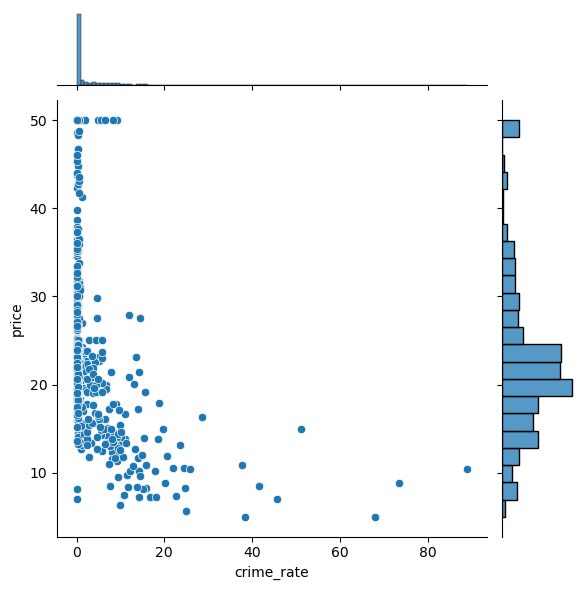

In [35]:
sns.jointplot(x='crime_rate', y='price', data=df)

First, we'll transform this variable and after that, we'll look out for outliers.

## Missing Values

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [37]:
df['n_hos_beds'] = df['n_hos_beds'].fillna(df['n_hos_beds'].mean())

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

## Seasonality

To remove seasonality from the data, we usually find a correction factor, which we multiply with the data to get a normalized value.

## Bivariate Analysis

There are two popular ways of looking at two variable relationship:
- One is a graphical way, which is called **scatterplot**: How we should use scatterplot as we should first plodder **scatterplot** of each **independent variable** against the **dependent variables**. Then we should ask, is there a **visible relationship** between these variables?
    - If there is none. We should go back and check Business knowledge.
    - **If there is a **visible relationship**, then we should see if it is a **linear relationship** or not.
        - If it is a **linear relationship**, we will straight away use that variable for **linear regression** analysis.
        - If it is some **other sort of relationship**, we will **transform** the variables so that the transformed variable is now **linearly** related.
- Second one is tabular way, which is called **correlation matrix**: Then we will plot the correlation metrixs. We will look for the following two things: 
    - One, if the value is **low**, that is **near zero**. Between the dependent and the independent variables. This will basically represent that **probably** there is **no direct correlation** between the independent and the independent variable. And we can consider **discarding** that independent variable. 
    - Second, if there is very **high correlation** amongst the independent variables. So if we take two independent variables and correlation between these two us coming too high, it may suggest that the independent variables that we have selected **may not be truly independent**. And we may have to let go one of them because **having both** in the analysis leads to a type of **error** called **Multi-collinearity**. We can consider that will be removing any variable of the pair of independent variables, which show very high correlation coefficient, say, more than 0.8.

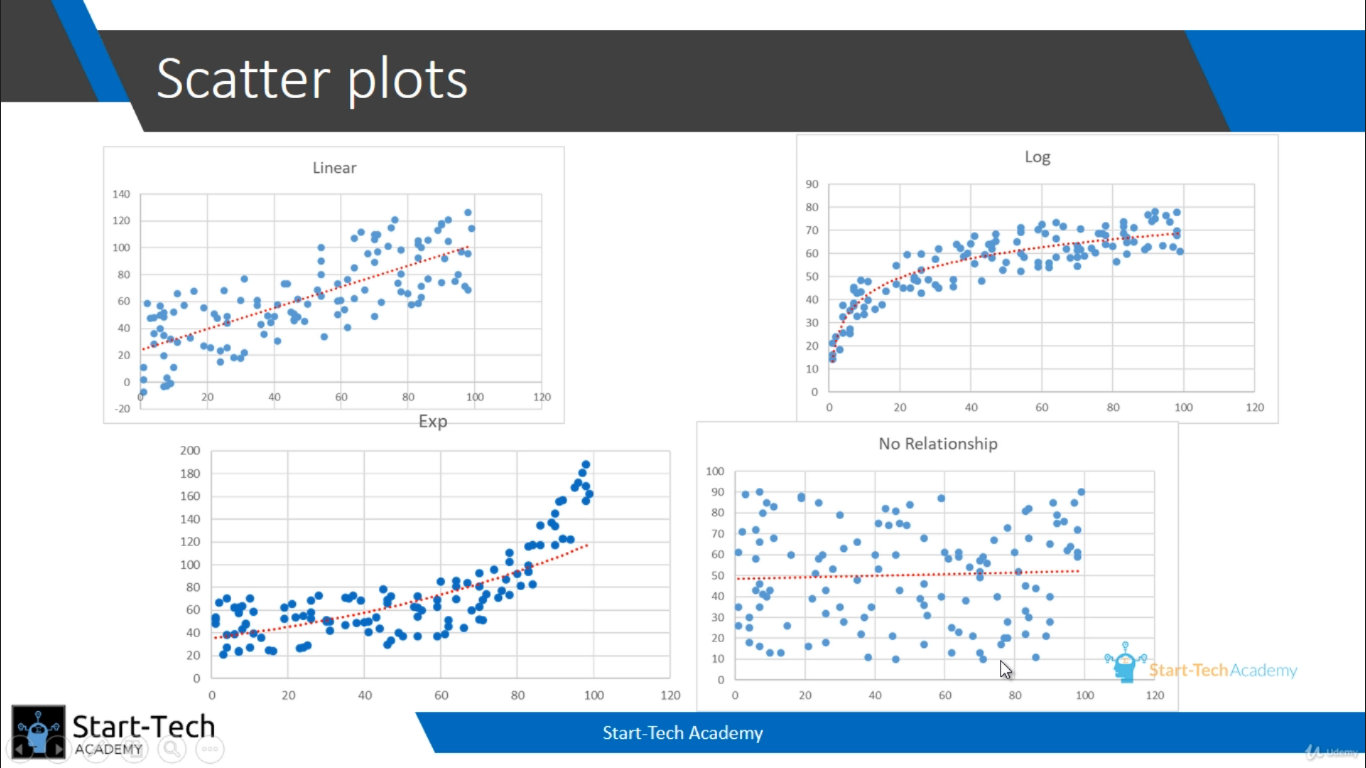

When the relationship between the two variables is some other functional form will need to **transform** the variable. We can modify the independent variable so that the modified version has a **more linear relationship** with the dependent variable. Keep in mind, **transforming** a variable is **not** a **mandatory** thing.

We are only transforming variables with the hope that it will eventually fit the model better once we know how to run the model. I will suggest that you run the model without doing the transformations and then we're doing the transformations so that you can see which of these two models fit your data better.